Importing Pandas and Hvplot 

In [1]:
# Dependencies and Setup
import hvplot.pandas
import pandas as pd
from pathlib import Path
import requests
import json
import hvplot.pandas
import matplotlib.pyplot as plt

In [45]:
data =filtered_dataframe
df = pd.DataFrame(data)
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df["2021 [YR2021],"], df['CPI_Rate'], c=df['COUNTRY'].astype('category').cat.codes, cmap='viridis', s=100)
plt.title('CPI Rate over Years for Different Countries')
plt.xlabel('Year')
plt.ylabel('CPI Rate')
legend1 = plt.legend(*scatter.legend_elements(), title="Country")
plt.gca().add_artist(legend1)
plt.tight_layout()
plt.show()


KeyError: '2021 [YR2021],'

<Figure size 1000x600 with 0 Axes>

Vaccinations Analysis 

In [38]:
file_path = Path("Resources/vaccination-data.csv")
vaccine_data = pd.read_csv(file_path)
vaccine_data.head()

,COUNTRY,ISO3,WHO_REGION,DATA_SOURCE,DATE_UPDATED,TOTAL_VACCINATIONS,PERSONS_VACCINATED_1PLUS_DOSE,TOTAL_VACCINATIONS_PER100,PERSONS_VACCINATED_1PLUS_DOSE_PER100,PERSONS_LAST_DOSE,PERSONS_LAST_DOSE_PER100,VACCINES_USED,FIRST_VACCINE_DATE,NUMBER_VACCINES_TYPES_USED,PERSONS_BOOSTER_ADD_DOSE,PERSONS_BOOSTER_ADD_DOSE_PER100
0,Aruba,ABW,AMRO,REPORTING,12/29/23,217124.0,90493.0,203.0,85.0,84363.0,79.0,NaN,2/17/21,NaN,35659.0,33.0
1,Afghanistan,AFG,EMRO,REPORTING,12/31/23,23000000.0,19200000.0,59.0,49.0,18400000.0,47.0,NaN,2/22/21,NaN,2729940.0,7.0
2,Angola,AGO,AFRO,REPORTING,12/31/23,27800000.0,16600000.0,85.0,50.0,9609080.0,29.0,NaN,3/10/21,NaN,3067091.0,9.0
3,Anguilla,AIA,AMRO,REPORTING,12/29/23,24864.0,10858.0,166.0,72.0,10382.0,69.0,NaN,2/5/21,NaN,3231.0,22.0
4,Albania,ALB,EURO,REPORTING,12/23/23,3088966.0,1349255.0,107.0,47.0,1279333.0,44.0,NaN,1/13/21,NaN,402371.0,14.0


Creating a clean DataFrame

In [39]:

data = vaccine_data
columns_to_exclude = ["TOTAL_VACCINATIONS","PERSONS_VACCINATED_1PLUS_DOSE","PERSONS_LAST_DOSE","PERSONS_LAST_DOSE_PER100","VACCINES_USED","NUMBER_VACCINES_TYPES_USED","PERSONS_BOOSTER_ADD_DOSE"]
df_filtered = data.drop(columns =columns_to_exclude)
df_filtered

,COUNTRY,ISO3,WHO_REGION,DATA_SOURCE,DATE_UPDATED,TOTAL_VACCINATIONS_PER100,PERSONS_VACCINATED_1PLUS_DOSE_PER100,FIRST_VACCINE_DATE,PERSONS_BOOSTER_ADD_DOSE_PER100
0,Aruba,ABW,AMRO,REPORTING,12/29/23,203.0,85.0,2/17/21,33.0
1,Afghanistan,AFG,EMRO,REPORTING,12/31/23,59.0,49.0,2/22/21,7.0
2,Angola,AGO,AFRO,REPORTING,12/31/23,85.0,50.0,3/10/21,9.0
3,Anguilla,AIA,AMRO,REPORTING,12/29/23,166.0,72.0,2/5/21,22.0
4,Albania,ALB,EURO,REPORTING,12/23/23,107.0,47.0,1/13/21,14.0
...,...,...,...,...,...,...,...,...,...
210,"Taiwan, China",TWN,NaN,REPORTING,NaN,NaN,NaN,NaN,NaN
211,Viet Nam,VNM,WPRO,REPORTING,6/30/23,274.0,93.0,3/8/21,60.0
212,Vanuatu,VUT,WPRO,REPORTING,2/20/23,116.0,58.0,6/2/21,5.0
213,Wallis and Futuna,WLF,WPRO,REPORTING,1/23/23,154.0,64.0,3/19/21,30.0


First Dose 

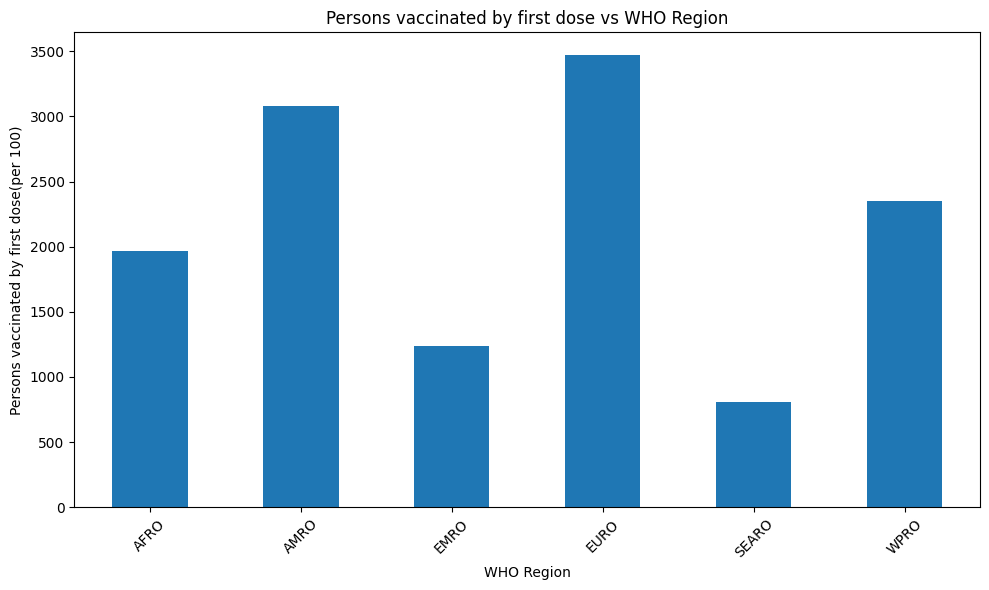

In [45]:
df_grouped = df_filtered.groupby("WHO_REGION").sum()


plt.figure(figsize=(10, 6))
df_grouped["PERSONS_VACCINATED_1PLUS_DOSE_PER100"].plot(kind='bar')

plt.title('Persons vaccinated by first dose vs WHO Region')
plt.xlabel('WHO Region')
plt.ylabel('Persons vaccinated by first dose(per 100)')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Booster Shot

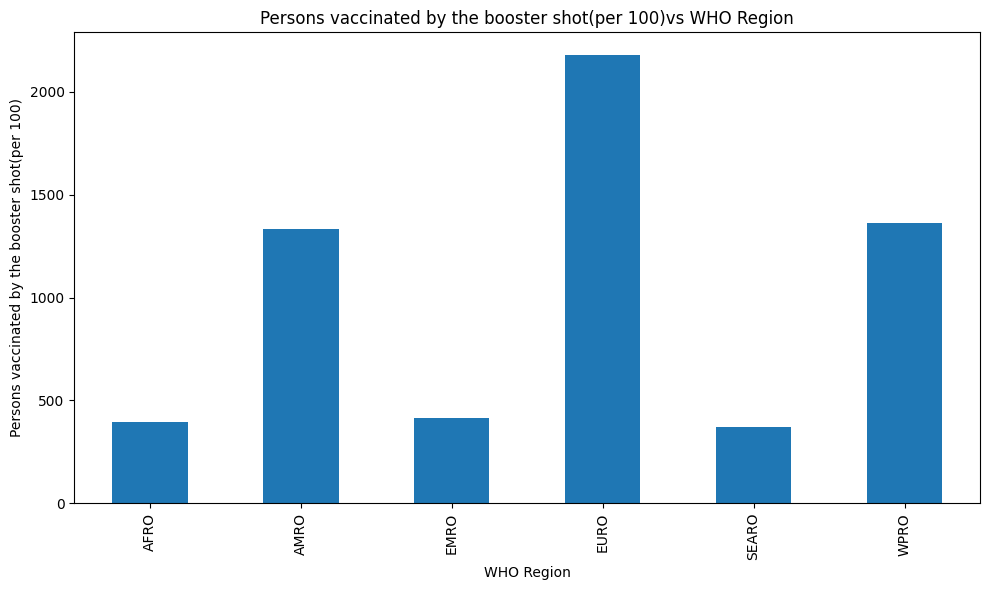

In [44]:
df_grouped = df_filtered.groupby('WHO_REGION').sum()

# Plotting the country vs total vaccinations
plt.figure(figsize=(10, 6))
df_grouped["PERSONS_BOOSTER_ADD_DOSE_PER100"].plot(kind='bar')

# Adding title and labels
plt.title("Persons vaccinated by the booster shot(per 100)vs WHO Region")
plt.xlabel('WHO Region')
plt.ylabel("Persons vaccinated by the booster shot(per 100)")

# Displaying the plot
plt.tight_layout()
plt.show()

CPI Dataset(2021 to 2022)

In [46]:
file_path = Path("Resources/CPI rates.csv")
CPI_data = pd.read_csv(file_path)
CPI_data.head()

,Series Name,Series Code,COUNTRY,Country Code,1990 [YR1990],2000 [YR2000],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022],2023 [YR2023]
0,Consumer price index (2010 = 100),FP.CPI.TOTL,Afghanistan,AFG,..,..,133.7683667,132.8832092,138.7086655,145.6107414,146.5224819,149.8959752,..,..,..,..
1,Consumer price index (2010 = 100),FP.CPI.TOTL,Albania,ALB,..,74.13822455,109.3241873,111.3971641,112.8179589,115.0592696,117.3927402,119.0492584,120.9789119,123.448662,131.7508348,..
2,Consumer price index (2010 = 100),FP.CPI.TOTL,Algeria,DZA,15.51936355,70.438128,120.9498642,126.7366464,134.8448702,142.3842032,148.4639947,151.3616678,155.0172502,166.2188945,181.619932,198.5508576
3,Consumer price index (2010 = 100),FP.CPI.TOTL,American Samoa,ASM,..,..,..,..,..,..,..,..,..,..,..,..
4,Consumer price index (2010 = 100),FP.CPI.TOTL,Andorra,AND,..,..,..,..,..,..,..,..,..,..,..,..


In [47]:
CPI_data = CPI_data.set_index(["Series Name", "COUNTRY","2021 [YR2021]","2022 [YR2022]"])
columns_to_keep = [col for col in CPI_data.columns if col.isdigit() and int(col) >= 2019]
filtered_dataframe = CPI_data[columns_to_keep]
filtered_dataframe

Empty DataFrame
Columns: []
Index: [(Consumer price index (2010 = 100), Afghanistan, .., ..), (Consumer price index (2010 = 100), Albania, 123.448662, 131.7508348), (Consumer price index (2010 = 100), Algeria, 166.2188945, 181.619932), (Consumer price index (2010 = 100), American Samoa, .., ..), (Consumer price index (2010 = 100), Andorra, .., ..), (Consumer price index (2010 = 100), Angola, 583.6757794, 708.3214356), (Consumer price index (2010 = 100), Antigua and Barbuda, 118.5555947, 127.4841094), (Consumer price index (2010 = 100), Argentina, .., ..), (Consumer price index (2010 = 100), Armenia, 140.1344107, 152.2433006), (Consumer price index (2010 = 100), Aruba, .., ..), (Consumer price index (2010 = 100), Australia, 124.2715921, 132.4661811), (Consumer price index (2010 = 100), Austria, 123.0008436, 133.5135657), (Consumer price index (2010 = 100), Azerbaijan, 171.9431828, 195.7611978), (Consumer price index (2010 = 100), Bahamas, The, 119.6410383, 126.3474046), (Consumer price index (2010 = 100), Bahrain, 115.3158755, 119.4969305), (Consumer price index (2010 = 100), Bangladesh, 200.4370392, 215.8645866), (Consumer price index (2010 = 100), Barbados, .., 155.6488283), (Consumer price index (2010 = 100), Belarus, 587.3011498, 676.6277476), (Consumer price index (2010 = 100), Belgium, 120.8569583, 132.456219), (Consumer price index (2010 = 100), Belize, 109.7281231, 116.6156402), (Consumer price index (2010 = 100), Benin, 116.0441915, 117.6116916), (Consumer price index (2010 = 100), Bermuda, .., ..), (Consumer price index (2010 = 100), Bhutan, 192.7040733, 203.5709773), (Consumer price index (2010 = 100), Bolivia, 150.8167617, 153.4505182), (Consumer price index (2010 = 100), Bosnia and Herzegovina, .., ..), (Consumer price index (2010 = 100), Botswana, 163.633197, 182.721938), (Consumer price index (2010 = 100), Brazil, 187.1174251, 204.4821206), (Consumer price index (2010 = 100), British Virgin Islands, .., ..), (Consumer price index (2010 = 100), Brunei Darussalam, 102.6981047, 106.479706), (Consumer price index (2010 = 100), Bulgaria, 120.1683043, 138.5844081), (Consumer price index (2010 = 100), Burkina Faso, 114.4345199, 130.7874822), (Consumer price index (2010 = 100), Burundi, 211.8712266, 251.7048788), (Consumer price index (2010 = 100), Cabo Verde, 113.2411951, 122.2222742), (Consumer price index (2010 = 100), Cambodia, 137.8508362, 145.217175), (Consumer price index (2010 = 100), Cameroon, 124.3020101, 132.0679984), (Consumer price index (2010 = 100), Canada, 121.5870063, 129.8583286), (Consumer price index (2010 = 100), Cayman Islands, .., ..), (Consumer price index (2010 = 100), Central African Republic, 160.9564905, 169.9429607), (Consumer price index (2010 = 100), Chad, 122.0021916, 129.0637113), (Consumer price index (2010 = 100), Channel Islands, .., ..), (Consumer price index (2010 = 100), Chile, 142.0812728, 158.6250269), (Consumer price index (2010 = 100), China, 129.3662166, 131.9193567), (Consumer price index (2010 = 100), Colombia, 149.5597632, 164.7808063), (Consumer price index (2010 = 100), Comoros, .., ..), (Consumer price index (2010 = 100), Congo, Dem. Rep., .., ..), (Consumer price index (2010 = 100), Congo, Rep., 129.1585754, 133.0894435), (Consumer price index (2010 = 100), Costa Rica, 132.0203794, 142.9447686), (Consumer price index (2010 = 100), Cote d'Ivoire, 118.991106, 125.2692757), (Consumer price index (2010 = 100), Croatia, 112.7952756, 124.9552613), (Consumer price index (2010 = 100), Cuba, .., ..), (Consumer price index (2010 = 100), Curacao, .., ..), (Consumer price index (2010 = 100), Cyprus, 104.3480396, 113.1085615), (Consumer price index (2010 = 100), Czechia, 124.7715463, 143.6122559), (Consumer price index (2010 = 100), Denmark, 112.8649228, 121.5516472), (Consumer price index (2010 = 100), Djibouti, 123.8348004, 130.2492059), (Consumer price index (2010 = 100), Dominica, 106.2182567, 114.4826905), (Consumer price index (2010 = 100), Dominican Republic, 148.476613, 161.5

In [53]:
CPI_2021 = "2021 [YR2021]"
CPI_2022 = "2022 [YR2022]"

In [49]:
merged_data = CPI_data.merge(vaccine_data, on="COUNTRY", how="inner")
organized_data = merged_data.sort_values(by="WHO_REGION")
import ace_tools as tools; tools.display_dataframe_to_user(name="Organized CPI and WHO Data by WHO Region", dataframe=organized_data)
grouped_by_region = merged_with_region.groupby("WHO Region").mean(numeric_only=True)
tools.display_dataframe_to_user(name="Grouped Data by WHO Region", dataframe=grouped_by_region)

ModuleNotFoundError: No module named 'ace_tools'

GDP(2021 and 2022)

In [50]:
file_path = Path("Resources/GDP.csv")
GDP_data = pd.read_csv(file_path)
GDP_data.head()

,Series Name,Series Code,COUNTRY,Country Code,1990 [YR1990],2000 [YR2000],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022],2023 [YR2023]
0,GDP per capita (current US$),NY.GDP.PCAP.CD,Afghanistan,AFG,..,180.1883694,626.5129291,566.8811297,523.053012,526.140801,492.090631,497.7414313,512.055098,355.7778264,352.6037331,..
1,GDP per capita (current US$),NY.GDP.PCAP.CD,Albania,ALB,617.2304355,1126.68334,4578.633208,3952.803574,4124.05539,4531.032207,5287.660801,5396.214243,5343.037704,6377.203096,6810.114041,8367.775731
2,GDP per capita (current US$),NY.GDP.PCAP.CD,Algeria,DZA,2431.55136,1780.376063,6164.644699,4741.49977,4481.081962,4615.868744,4640.314145,4530.101745,3794.409524,4216.251285,5023.252932,5260.20625
3,GDP per capita (current US$),NY.GDP.PCAP.CD,American Samoa,ASM,..,..,12313.99736,13101.54182,13300.82461,12372.88478,13195.9359,13672.57666,15609.77722,16653.71378,19673.3901,..
4,GDP per capita (current US$),NY.GDP.PCAP.CD,Andorra,AND,19208.67838,21674.29972,45680.53499,38885.53032,39931.21698,40632.23155,42904.82846,41328.6005,37207.222,42066.49052,42350.69707,46544.72072


In [51]:
GDP_data = GDP_data.set_index(["Series Name","COUNTRY","2021 [YR2021]","2022 [YR2022]"])
columns_to_keep = [col for col in GDP_data.columns if col.isdigit() and int(col) >= 2019]
filtered_dataframe = GDP_data[columns_to_keep]
filtered_dataframe

Empty DataFrame
Columns: []
Index: [(GDP per capita (current US$), Afghanistan, 355.7778264, 352.6037331), (GDP per capita (current US$), Albania, 6377.203096, 6810.114041), (GDP per capita (current US$), Algeria, 4216.251285, 5023.252932), (GDP per capita (current US$), American Samoa, 16653.71378, 19673.3901), (GDP per capita (current US$), Andorra, 42066.49052, 42350.69707), (GDP per capita (current US$), Angola, 1927.474078, 2933.484644), (GDP per capita (current US$), Antigua and Barbuda, 17178.54372, 19919.72669), (GDP per capita (current US$), Argentina, 10650.86046, 13650.60463), (GDP per capita (current US$), Armenia, 4972.783204, 7018.051504), (GDP per capita (current US$), Aruba, 29127.75938, 33300.83882), (GDP per capita (current US$), Australia, 60697.24544, 65077.67667), (GDP per capita (current US$), Austria, 53517.89045, 52084.6812), (GDP per capita (current US$), Azerbaijan, 5408.045352, 7770.594223), (GDP per capita (current US$), Bahamas, The, 27871.37233, 32041.25039), (GDP per capita (current US$), Bahrain, 26850.00339, 30146.92503), (GDP per capita (current US$), Bangladesh, 2457.964466, 2687.899063), (GDP per capita (current US$), Barbados, 17586.33001, 20738.45119), (GDP per capita (current US$), Belarus, 7489.718947, 7994.648061), (GDP per capita (current US$), Belgium, 51863.83116, 49942.09064), (GDP per capita (current US$), Belize, 6060.968223, 6984.21696), (GDP per capita (current US$), Benin, 1360.911474, 1304.994797), (GDP per capita (current US$), Bermuda, 114274.622, 123091.1235), (GDP per capita (current US$), Bhutan, 3561.225287, 3704.018395), (GDP per capita (current US$), Bolivia, 3345.023002, 3600.121635), (GDP per capita (current US$), Bosnia and Herzegovina, 7237.274463, 7587.588173), (GDP per capita (current US$), Botswana, 7244.158548, 7726.110997), (GDP per capita (current US$), Brazil, 7794.880979, 9065.497334), (GDP per capita (current US$), British Virgin Islands, .., ..), (GDP per capita (current US$), Brunei Darussalam, 31448.91275, 37152.47697), (GDP per capita (current US$), Bulgaria, 12219.34187, 13974.44925), (GDP per capita (current US$), Burkina Faso, 888.8036109, 830.0439659), (GDP per capita (current US$), Burundi, 221.1578034, 259.0250314), (GDP per capita (current US$), Cabo Verde, 3489.973397, 3883.911159), (GDP per capita (current US$), Cambodia, 1625.235021, 1759.608023), (GDP per capita (current US$), Cameroon, 1654.257037, 1563.48894), (GDP per capita (current US$), Canada, 52496.84417, 55509.39318), (GDP per capita (current US$), Cayman Islands, 88940.15659, 96073.76359), (GDP per capita (current US$), Central African Republic, 461.137511, 427.0580962), (GDP per capita (current US$), Chad, 685.690315, 699.4632545), (GDP per capita (current US$), Channel Islands, 64502.53118, 64501.27424), (GDP per capita (current US$), Chile, 16185.91477, 15411.17395), (GDP per capita (current US$), China, 12617.5051, 12662.58317), (GDP per capita (current US$), Colombia, 6182.955944, 6657.086697), (GDP per capita (current US$), Comoros, 1577.470841, 1484.892465), (GDP per capita (current US$), Congo, Dem. Rep., 576.9747294, 664.5935433), (GDP per capita (current US$), Congo, Rep., 2540.470024, 2649.230634), (GDP per capita (current US$), Costa Rica, 12604.04884, 13365.3564), (GDP per capita (current US$), Cote d'Ivoire, 2649.173048, 2491.895934), (GDP per capita (current US$), Croatia, 17943.41513, 18673.17799), (GDP per capita (current US$), Cuba, .., ..), (GDP per capita (current US$), Curacao, 17980.08869, 20492.81531), (GDP per capita (current US$), Cyprus, 32745.83984, 32048.24805), (GDP per capita (current US$), Czechia, 26822.51419, 27226.61564), (GDP per capita (current US$), Denmark, 69268.6518, 67790.05399), (GDP per capita (current US$), Djibouti, 3062.551482, 3278.138696), (GDP per capita (current US$), Dominica, 7668.158132, 8347.32336), (GDP per capita (current US$), Dominican Republic, 8476.749639, 10111.24571), (GDP per capita (current US$), Ecuador, 6036.447274, 

In [52]:
GDP_2021 = "2021 [YR2021]"
GDP_2022 = "2022 [YR2022]"

Linear Regression (First Dose vs CPI 2021)

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

data = merged_data[['COUNTRY', 'PERSONS_VACCINATED_1PLUS_DOSE_PER100', '2021 [YR2021]']].dropna()  
data.rename(columns={'2021 [YR2021]': 'CPI 2021'}, inplace=True)
slope, intercept, r_value, p_value, std_err = linregress(data['PERSONS_VACCINATED_1PLUS_DOSE_PER100'], data['CPI 2021'])


plt.figure(figsize=(8, 6))
plt.scatter(data['PERSONS_VACCINATED_1PLUS_DOSE_PER100'], data['CPI 2021'], color='blue', label='Data Points')


x_values = data['First Dose %']
y_values = intercept + slope * x_values
plt.plot(x_values, y_values, color='red', label=f'Linear Regression Line')

plt.xlabel('First Dose % (Vaccination Rate)', fontsize=12)
plt.ylabel('CPI 2021', fontsize=12)
plt.title('First Dose Vaccination Rate vs CPI in 2021', fontsize=14)

plt.legend()


plt.grid(True)
plt.show()


print(f"Linear Regression Model: y = {slope:.2f}x + {intercept:.2f}")
print(f"Correlation (R-value): {r_value:.2f}")
print(f"P-value: {p_value:.4f}")
print(f"Standard Error: {std_err:.4f}")



NameError: name 'merged_data' is not defined

Linear Regression(Booster vs CPI 2022)

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

data = merged_data[['COUNTRY', 'PERSONS_BOOSTER_ADD_DOSE_PER100', '2022 [YR2022]']].dropna()  
data.rename(columns={'2021 [YR2021]': 'CPI 2021'}, inplace=True)
slope, intercept, r_value, p_value, std_err = linregress(data['PERSONS_BOOSTER_ADD_DOSE_PER100'], data['CPI 2022'])


plt.figure(figsize=(8, 6))
plt.scatter(data['PERSONS_BOOSTER_ADD_DOSE_PER100'], data['CPI 2022'], color='blue', label='Data Points')


x_values = data['First Dose %']
y_values = intercept + slope * x_values
plt.plot(x_values, y_values, color='red', label=f'Linear Regression Line')

plt.xlabel('First Dose % (Vaccination Rate)', fontsize=12)
plt.ylabel('CPI 2021', fontsize=12)
plt.title('First Dose Vaccination Rate vs CPI in 2021', fontsize=14)

plt.legend()


plt.grid(True)
plt.show()


print(f"Linear Regression Model: y = {slope:.2f}x + {intercept:.2f}")
print(f"Correlation (R-value): {r_value:.2f}")
print(f"P-value: {p_value:.4f}")
print(f"Standard Error: {std_err:.4f}")

NameError: name 'merged_data' is not defined

Linear Regression(First Dose vs GDP 2021)

Linear Regression(First Dose vs GDP 2022)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

data = merged_data[['COUNTRY', 'PERSONS_BOOSTER_ADD_DOSE_PER100', '2022 [YR2022]']].dropna()  
data.rename(columns={'2021 [YR2021]': 'CPI 2021'}, inplace=True)
slope, intercept, r_value, p_value, std_err = linregress(data['PERSONS_BOOSTER_ADD_DOSE_PER100'], data['CPI 2022'])


plt.figure(figsize=(8, 6))
plt.scatter(data['PERSONS_BOOSTER_ADD_DOSE_PER100'], data['CPI 2022'], color='blue', label='Data Points')


x_values = data['First Dose %']
y_values = intercept + slope * x_values
plt.plot(x_values, y_values, color='red', label=f'Linear Regression Line')

plt.xlabel('First Dose % (Vaccination Rate)', fontsize=12)
plt.ylabel('CPI 2021', fontsize=12)
plt.title('First Dose Vaccination Rate vs CPI in 2021', fontsize=14)

plt.legend()


plt.grid(True)
plt.show()


print(f"Linear Regression Model: y = {slope:.2f}x + {intercept:.2f}")
print(f"Correlation (R-value): {r_value:.2f}")
print(f"P-value: {p_value:.4f}")
print(f"Standard Error: {std_err:.4f}")